## Privacy HUB data Analysis

This is toy data which has been created within Privacy Hub and does not reflect any real people. The dataset includes a number of variables relating to physical attributes, hobbies and a ‘token’ which is used to distinguish one patient from another. A token is a value which is created from any one or more input values. It looks nonsensical (as it is a ‘hash’) and cannot be re-engineered to the original value.

### INITIAL OBSERVATIONS AND INFERENCE FROM DATASET
- The dataset includes columns for various attributes such as token, name,surname, sex, age, height, weight.kg, eyecolour, test.group, hobbies, and marstat (marital status).
- The dataset contains a mix of numerical (age, height, weight.kg, test.group) and categorical (sex, eyecolour, hobbies, marstat) data.
- The variable 'test.group' is not clearly defined in the dataset. This lack of clarity might hinder precise analysis.
- Misallignment in the data because of missing values.
- The absence of standardization in the 'sex' and 'marstat' column.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = 'DA_TaskSheet_Hobbies (1) (1).txt'
dataset = pd.read_csv(data)

In [4]:
colomn_names=['token','name','surname','sex','age','height','weight.kg', 'eyecolour', 'test.group', 'hobbies', 'marstat']

In [5]:
# Read the entire file into a DataFrame
df = pd.read_csv(data, delim_whitespace=True, nrows=1)
# Extract column names from the first row
column_names = df.columns.tolist()

C:\Users\AhmedShafique\AppData\Local\Temp\ipykernel_7928\640884193.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data, delim_whitespace=True, nrows=1)


In [6]:
df.describe()

,age,height,weight.kg,test.group
count,1.0,1.00,1.0,1.0
mean,31.0,1.81,96.6,1.0
std,NaN,NaN,NaN,NaN
min,31.0,1.81,96.6,1.0
25%,31.0,1.81,96.6,1.0
50%,31.0,1.81,96.6,1.0
75%,31.0,1.81,96.6,1.0
max,31.0,1.81,96.6,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   token       1 non-null      object 
 1   name        1 non-null      object 
 2   surname     1 non-null      object 
 3   sex         1 non-null      object 
 4   age         1 non-null      int64  
 5   height      1 non-null      float64
 6   weight.kg   1 non-null      float64
 7   eyecolour   1 non-null      object 
 8   test.group  1 non-null      int64  
 9   hobbies     1 non-null      object 
 10  marstat     1 non-null      object 
dtypes: float64(2), int64(2), object(7)
memory usage: 216.0+ bytes


In [8]:
df.head()

,token,name,surname,sex,age,height,weight.kg,eyecolour,test.group,hobbies,marstat
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,male,31,1.81,96.6,blue,1,"Plays cricket, football and rugby",married


In [9]:
filtered_data = df[(df['eyecolour']=='blue') & (df['age'] > 20) & (df['age'] < 50)]

In [10]:
#converting to numeric data to weight.kg
filtered_data.loc[:,'weight.kg'] = pd.to_numeric(filtered_data['weight.kg'], errors='coerce')

In [11]:
average_weight = filtered_data['weight.kg'].mean()
print(average_weight)

96.6


The average weight of individuals with `blue eyes` aged between 20 and 50 years (inclusive) in the dataset is approximately `96.6 kgs`. This calculation was achieved by filtering the dataset to include the records matching the criteria for eye color to 'blue' within the specified age range. Subsequently, the mean weight is determined for this refined group.

Here is a new library we are going to study in this course known as `seaborn`

In [12]:
import seaborn as sns

In [13]:
df['height'] = pd.to_numeric(filtered_data['height'], errors='coerce')

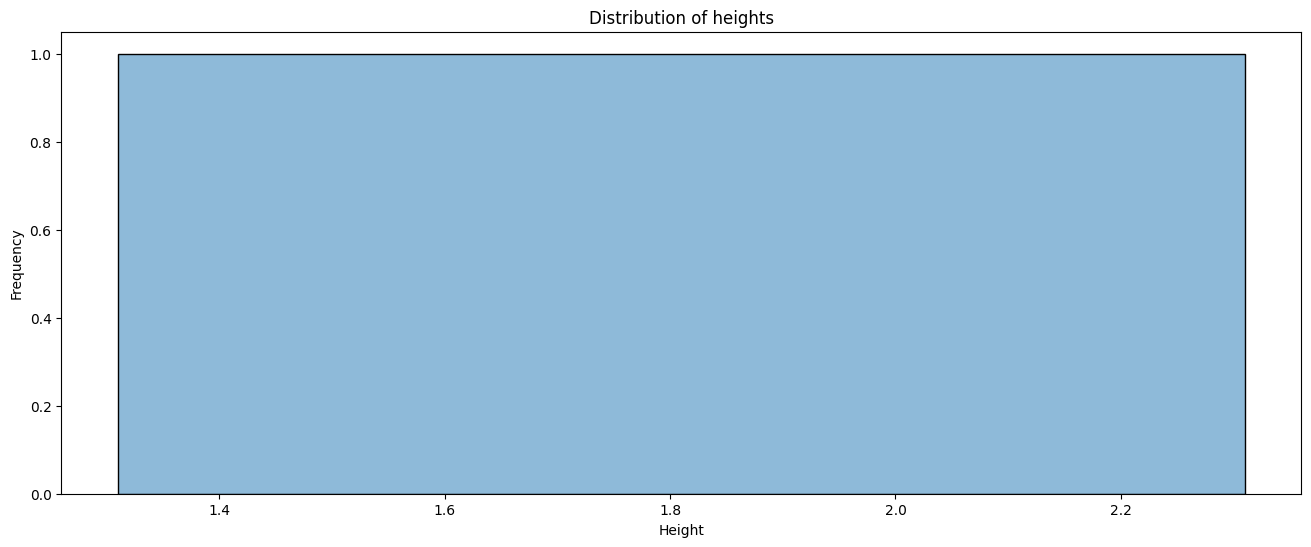

count    1.00
mean     1.81
std       NaN
min      1.81
25%      1.81
50%      1.81
75%      1.81
max      1.81
Name: height, dtype: float64

In [14]:
plt.figure(figsize=(16,6))
sns.histplot(df['height'].dropna(), kde=True)
plt.title('Distribution of heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.ylim(0, None)
plt.show()

height_stats = df['height'].describe()
height_stats

In [15]:
height_data = df.loc[:, 'height']

In [16]:
def convert_to_cm(height_data):
    return height_data*2.54

In [19]:
df['height_cm'] = df['height'] * 2.54